# Predicting heart disease using Machine Learning

The notebook looks into using various Python-based machine learning and Data Science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease on their medical attribute.

We are going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have a stroke disease?

# 2. Data

The orginal data came from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# 3. Evaluation

> If we can 95% accuracy at predicting whether or not a patient has stroke disease during the proof of concept, we will pursue the project.

# 4. Featues 
This is where you will get different information about each of the features in your data. You can do this by doing your own research (such as looking at the links above) or by talking to the subject matter expert(someone who knows about the dataset).

 
 ***Create Data Dictionary***
 
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

pandas for data analysis.
NumPy for numerical operations.
Matplotlib/seaborn for plotting or data visualization.
Scikit-Learn for machine learning modelling and evaluation.

In [2]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
import xgboost as xgb

# We want our plots to appear in the notebook
%matplotlib inline 

# For Numerical Conversion
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Models for Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [4]:
df = pd.read_csv("stroke-dataset.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [47]:
df.shape 

(5110, 12)

# Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject amtter expert on the data you are working with.

1. What questions are you are trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change, or remove features to get more out of your data

In [48]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [49]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [51]:
# Lets find out how many of each class there are
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

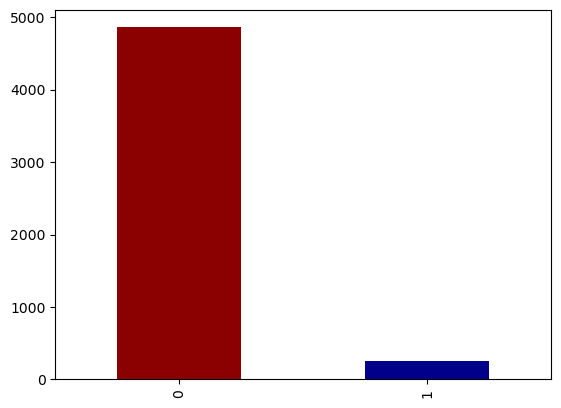

In [52]:
df["stroke"].value_counts().plot(kind="bar", color=["darkred", "darkblue"]);

In [53]:
# Are there any missing values?
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [54]:
# Fill missing values wiyth pandas
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

# Remove rows with missing stroke values
df.dropna(inplace=True)

In [55]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [57]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [58]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [59]:
pd.crosstab(df.stroke, df.gender)

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


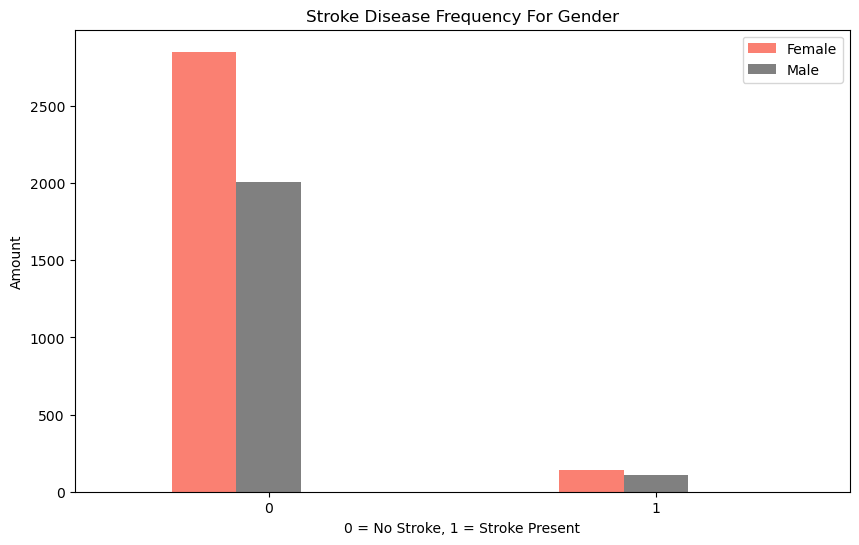

In [60]:
# Create a plot of crosstab
pd.crosstab(df.stroke, df.gender).plot(kind="bar",
                                       figsize=(10, 6),
                                       color=["salmon", "gray"])

plt.title("Stroke Disease Frequency For Gender")
plt.xlabel("0 = No Stroke, 1 = Stroke Present")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

# Age vs BMI for Stroke Disease

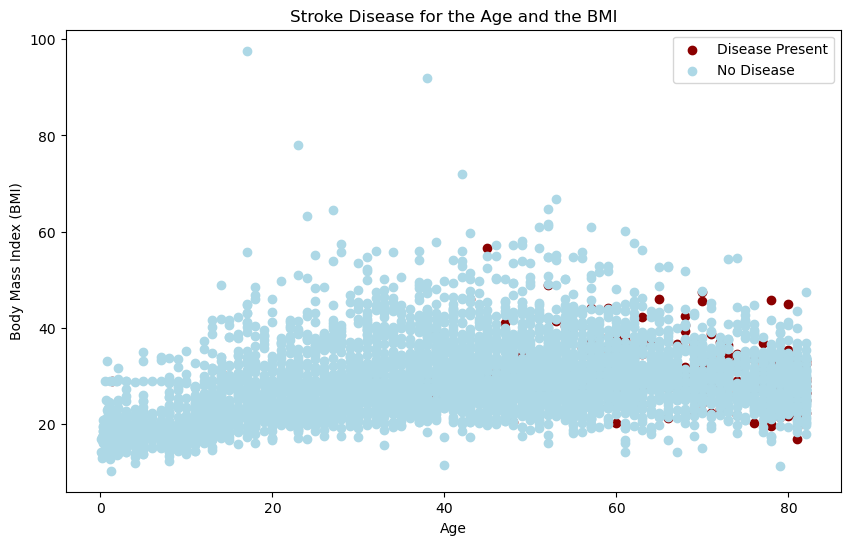

In [61]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positve examples
plt.scatter(df.age[df.stroke==1],
            df.bmi[df.stroke==1],
            color="darkred");

# Scatter with negative examples
plt.scatter(df.age[df.stroke==0],
            df.bmi[df.stroke==0],
            color="lightblue");

# Add some helpful info
plt.title("Stroke Disease for the Age and the BMI")
plt.xlabel("Age")
plt.ylabel("Body Mass Index (BMI)")
plt.legend(["Disease Present", "No Disease"])
plt.xticks(rotation=0);

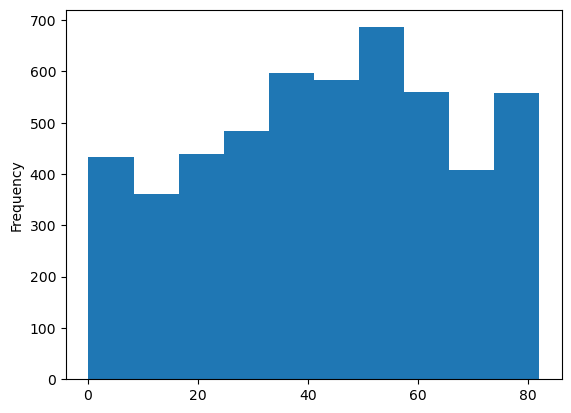

In [62]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

# Stroke Disease Frequency per Hypertension
* Hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.

In [63]:
pd.crosstab(df.hypertension, df.stroke)

stroke,0,1
hypertension,,
0,4429,183
1,432,66


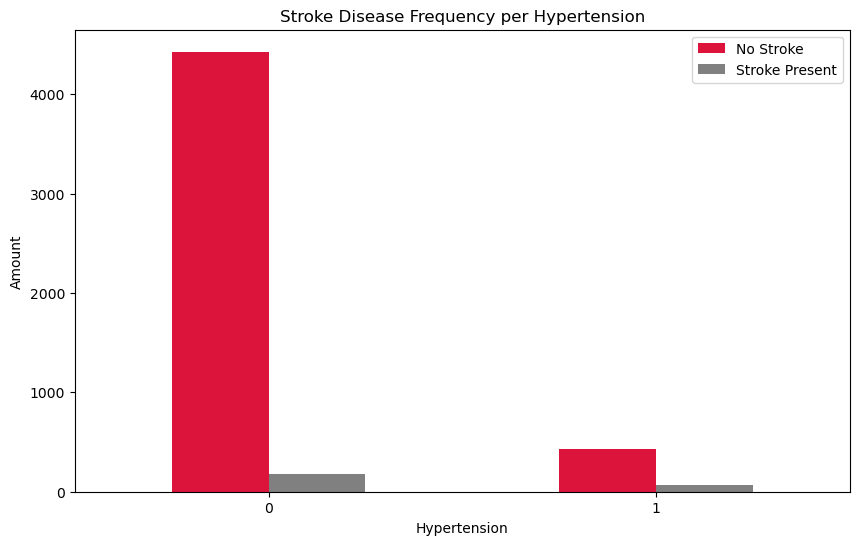

In [64]:
# Make the crosstab more visual
pd.crosstab(df.hypertension, df.stroke).plot(kind="bar",
                                             figsize=(10, 6),
                                             color=["crimson", "gray"])

# Add some communication
plt.title("Stroke Disease Frequency per Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Amount")
plt.legend(["No Stroke", "Stroke Present"])
plt.xticks(rotation=0);

# Stroke Disease Frequency per Work Type

7) work_type: 
    * "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

In [65]:
pd.crosstab(df.work_type, df.stroke)

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


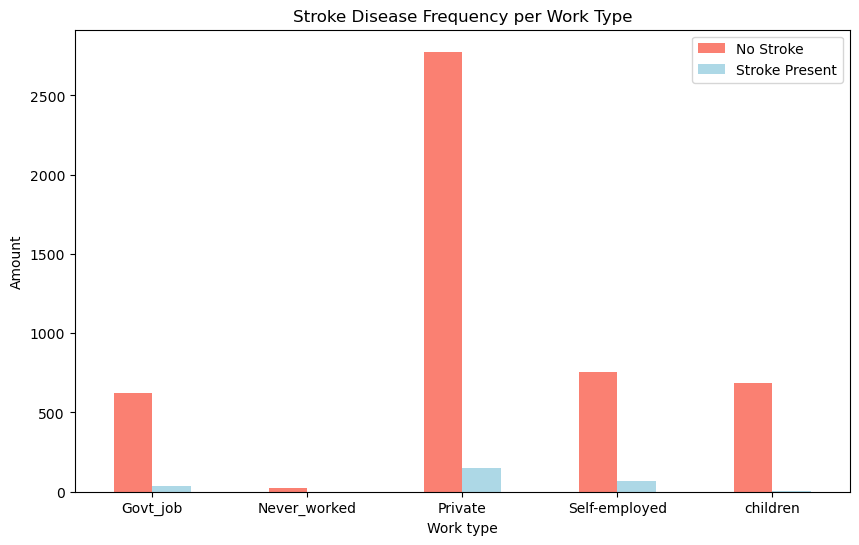

In [5]:
# Make the crosstab more visual
pd.crosstab(df.work_type, df.stroke).plot(kind="bar",
                                          figsize=(10, 6),
                                          color=["salmon", "lightblue"])

# Add some communication
plt.title("Stroke Disease Frequency per Work Type")
plt.xlabel("Work type")
plt.ylabel("Amount")
plt.legend(["No Stroke", "Stroke Present"])
plt.xticks(rotation=0);

# Stroke Disease Frequency per Smoking Status

11) smoking_status: 
    * "formerly smoked", "never smoked", "smokes" or "Unknown"*

In [67]:
pd.crosstab(df.smoking_status, df.stroke)

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


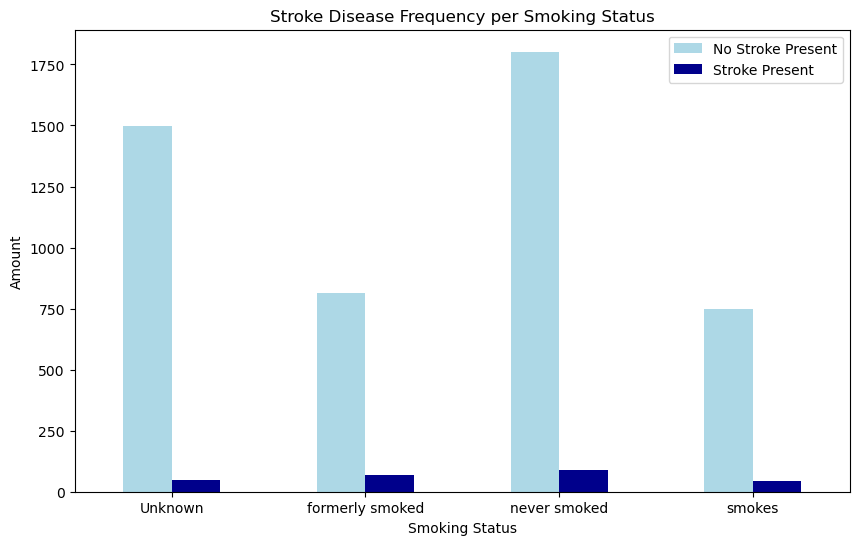

In [68]:
# Make the crosstab more visual
pd.crosstab(df.smoking_status, df.stroke).plot(kind="bar",
                                          figsize=(10, 6),
                                          color=["lightblue", "darkblue"])
# Add some communication
plt.title("Stroke Disease Frequency per Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Amount")
plt.legend(["No Stroke Present", "Stroke Present"])
plt.xticks(rotation=0);

In [69]:
# Make a correlation matrix
df.corr()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_6424\1478283149.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


C:\Users\Daniel\AppData\Local\Temp\ipykernel_6424\33195348.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


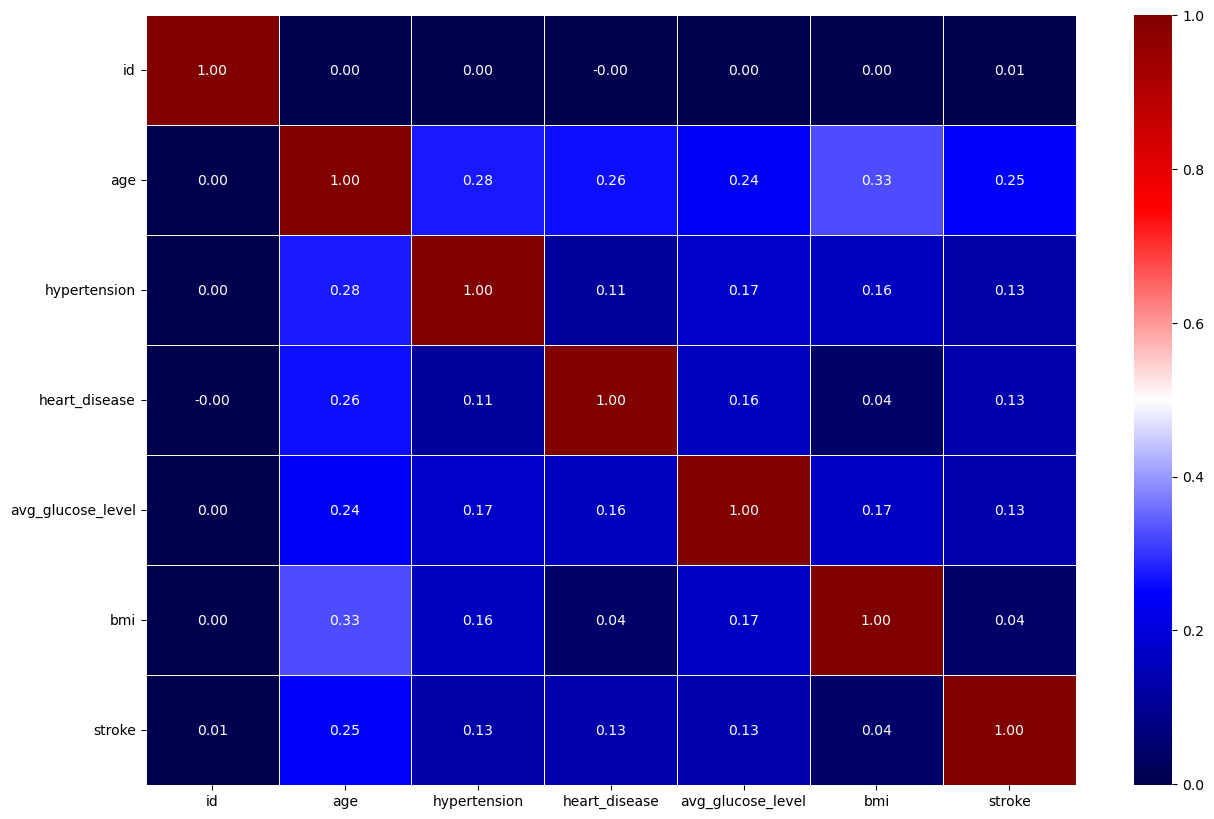

In [70]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="seismic");

In [71]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [79]:
# Split data into X and y
X = df.drop("stroke", axis=1)
y = df["stroke"]

# import random seed
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
X.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [84]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd

# Fill categorical values with 'missing' & numerical values with mean
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")

# Define columns
num_features = ["bmi"]
cat_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

# Create an imputer
imputer = ColumnTransformer([
    ("num_imputer", num_imputer, num_features),
    ("cat_imputer", cat_imputer, cat_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Get our transformed data arrays back into DataFrames
df_filled_train = pd.DataFrame(filled_X_train, columns=["bmi"] + cat_features)
df_filled_test = pd.DataFrame(filled_X_test, columns=["bmi"] + cat_features)

# Check missing data in the training set
df_filled_train.isna().sum()

bmi               0
gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

# Okay, no missing values but we've still got to turn our data into numbers. Let's do that using one hot encoding. Again, keeping our training and test data separate.

In [152]:
# Define categorical features
categorical_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

# Create an instance of OneHotEncoder
one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Create a ColumnTransformer to apply the OneHotEncoder on categorical features
preprocessor = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough")

# Apply the transformation to train and test data
transformed_X_train = preprocessor.fit_transform(df_filled_train)
transformed_X_test = preprocessor.transform(df_filled_test)

transformed_X_train

C:\Users\Daniel\Desktop\stroke-disease-project\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.0, 1.0, 0.0, ..., 0.0, 0.0, 28.5],
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 36.3],
       [1.0, 0.0, 1.0, ..., 1.0, 0.0, 33.7],
       ...,
       [1.0, 0.0, 1.0, ..., 0.0, 0.0, 17.8],
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 31.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 50.3]], dtype=object)

Now we have got our data split into training and test sets, it is time to build a Machine learning model.

We will train it (find the patterns) on the tarining set.

And we will test it(use the patterns) on the test set.

We are going to try 3 Machine learning models:
1. Logistic Regression
2. Random Forest Classifier
3. XGboost Classifier

In [153]:
# Put models in a dictionary, this helps to avoid going over all the models one by one in fitting and all.
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "XG Boost": xgb.XGBClassifier()}

# Create a function tpo fit and score models
def fit_and_score(models, transformed_X_train, transformed_X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models : a dictionary of different Scikit-learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(transformed_X_train, y_train)
        # Evaluate the model and appedn its score to model_scores
        model_scores[name] = model.score(transformed_X_test, y_test)
    return model_scores

In [96]:
model_scores = fit_and_score(models=models,
                             transformed_X_train=transformed_X_train,
                             transformed_X_test=transformed_X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Daniel\Desktop\stroke-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9393346379647749,
 'Random Forest': 0.9197651663405088,
 'XG Boost': 0.9354207436399217}

# Model Comparison

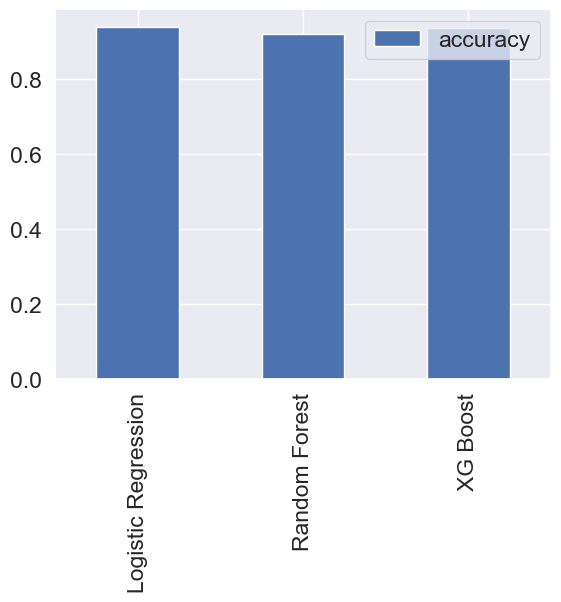

In [154]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();  # 'T" is for transpose, else they will overlap

Now we have got a baseline model and we know a models first prediction are not what we should always base our next steps on. What should we do? 

Lets looks at the following:
* Hyperparametr Tuning
* Feature importance

Then these ones below is because it is a classification problem. It differs in regression problems.

* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

# Hyperparameter Tuning with RandomSearchCV
* Let us tune Logistic Regression and XGBoost

In [155]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-5, 5, 25),
                "solver": ["liblinear"]}

# Create hyperparameter grid for XGBClassifier
xg_grid = {
    'learning_rate': [0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

Now we have got hyperparameters grids setup for each of our models, lets tune them using RandomizedSearcCV

In [156]:
# Tune Logistic Regression
np.random.seed(42)

# Setup RandomSearchCV hyperparameter for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=30,
                                verbose=True)

# Fit RandomSearchCV hyperpaarameter model for Logisticregression
rs_log_reg.fit(transformed_X_train, y_train)

C:\Users\Daniel\Desktop\stroke-disease-project\env\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 25 is smaller than n_iter=30. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-05, 2.61015722e-05, 6.81292069e-05, 1.77827941e-04,
       4.64158883e-04, 1.21152766e-03, 3.16227766e-03, 8.25404185e-03,
       2.15443469e-02, 5.62341325e-02, 1.46779927e-01, 3.83118685e-01,
       1.00000000e+00, 2.61015722e+00, 6.81292069e+00, 1.77827941e+01,
       4.64158883e+01, 1.21152766e+02, 3.16227766e+02, 8.25404185e+02,
       2.15443469e+03, 5.62341325e+03, 1.46779927e+04, 3.83118685e+04,
       1.00000000e+05]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [157]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1e-05}

In [158]:
# Evaluate the Logistic regression Model
rs_log_reg.score(transformed_X_test, y_test)

0.9393346379647749

Now we have tuned our LogisticsRegression, lets us take a look at XGBoostClassifier

In [159]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for XGBClassifier
rs_xg = RandomizedSearchCV(xgb.XGBClassifier(),
                           param_distributions=xg_grid,
                           cv=5,
                           n_iter=20,
                           refit=True, # set refit=True (default) to refit the best model on the full dataset
                           verbose=True)

# Fit random hyperparameter search model for XGBClassifier()
rs_xg.fit(transformed_X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=True)

In [161]:
rs_xg.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'max_depth': 7,
 'learning_rate': 0.001,
 'colsample_bytree': 1.0}

In [162]:
rs_xg.score(transformed_X_test, y_test)

0.9393346379647749

# Now let's see how we can tune our Hyperparameter with GridSearchCV

Since our LogisticRegression and XGBClassifier models provides the same and best scores so far, we will and improve them again using GridSearchCV

In [163]:
# Different Hyperparameters for our LogisticRegression Model
log_reg_grid = {"C": np.logspace(-5, 5, 40),
                "solver": ["liblinear"]}

# Set Random Seed
np.random.seed(42)

# Setup Grid Hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True,
                          refit=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(transformed_X_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [164]:
# Check the best hyperparamters
gs_log_reg.best_params_

{'C': 1e-05, 'solver': 'liblinear'}

In [165]:
# Evaluate the GridSearch LogisticRegression model
gs_log_reg.score(transformed_X_test, y_test)

0.9393346379647749

In [166]:
# Create hyperparameter grid for XGBClassifier
xg_grid = {
    'learning_rate': [0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for XGBClassifier
gs_xg = GridSearchCV(xgb.XGBClassifier(),
                           param_grid=xg_grid,
                           cv=5,
                           refit=True, # set refit=True (default) to refit the best model on the full dataset
                           verbose=True)

# Fit GridSearchCV hyperparameter search model for XGBClassifier()
gs_xg.fit(transformed_X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.001], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=True)

In [167]:
#Check the best hyperparameter
gs_xg.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [168]:
gs_xg.score(transformed_X_test, y_test)

0.9393346379647749

# Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if the cross-validation was used where possible.

To make comaparisons and evaluate our model, first we need to make predictions.

In [169]:
# Make Predictions with tuned model
y_preds = gs_log_reg.predict(transformed_X_test)

In [170]:
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [171]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
3605    0
4934    0
4835    0
4105    0
2902    0
Name: stroke, Length: 1022, dtype: int64

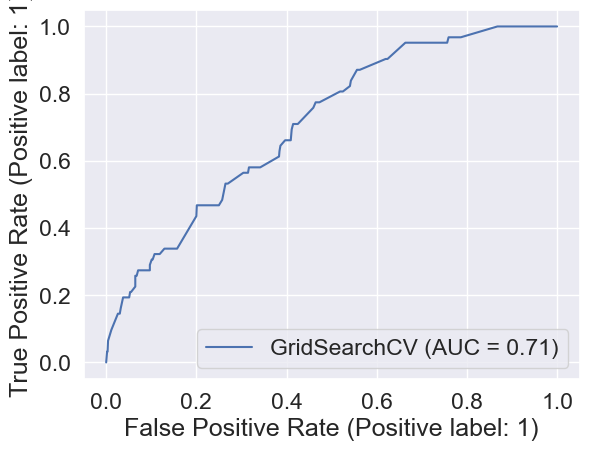

In [172]:
# Plot ROC Curve and Calculate AUC metric
RocCurveDisplay.from_estimator(gs_xg, transformed_X_test, y_test);

In [173]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[960   0]
 [ 62   0]]


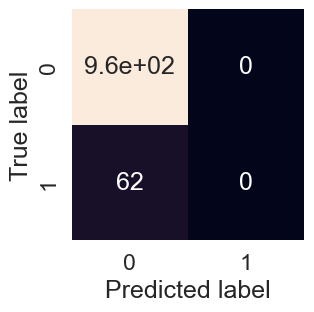

In [174]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

Now we have got a ROC curve, an AUC metric, and a Confusion matrix, lets get a clasification report as well as cross-validation, precision, recall and f1-score

In [175]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\Daniel\Desktop\stroke-disease-project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniel\Desktop\stroke-disease-project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniel\Desktop\stroke-disease-project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m